In [1]:
# !pip install --upgrade pip
import pandas as pd
import numpy as np
import keras
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline
# !pip install seaborn
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping

import sklearn.metrics as metrics
from keras.callbacks import LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten , BatchNormalization
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
import tensorflow as tf
!pip install livelossplot
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from livelossplot.tf_keras import PlotLossesCallback

from tensorflow.keras import regularizers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import os
import pandas as pd

MildDemented_dir = r'/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/MildDemented'
ModerateDemented_dir = r'/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/ModerateDemented'
NonDemented_dir = r'/kaggle/input/augmented-alzheimer-mri-dataset/OriginalDataset/NonDemented'
VeryMildDemented_dir = r'/kaggle/input/augmented-alzheimer-mri-dataset/OriginalDataset/VeryMildDemented'

filepaths = []
labels = []
dict_list = [MildDemented_dir, ModerateDemented_dir, NonDemented_dir, VeryMildDemented_dir]
class_labels = ['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very MildDemented']

for i, j in enumerate(dict_list):
    flist = os.listdir(j)
    for f in flist:
        fpath = os.path.join(j, f)
        filepaths.append(fpath)
        labels.append(class_labels[i])

Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
Alzheimer_data = pd.concat([Fseries, Lseries], axis=1)
Alzheimer_df = pd.DataFrame(Alzheimer_data)
print(Alzheimer_df.head())
print(Alzheimer_df["labels"].value_counts())

                                           filepaths         labels
0  /kaggle/input/augmented-alzheimer-mri-dataset/...  Mild Demented
1  /kaggle/input/augmented-alzheimer-mri-dataset/...  Mild Demented
2  /kaggle/input/augmented-alzheimer-mri-dataset/...  Mild Demented
3  /kaggle/input/augmented-alzheimer-mri-dataset/...  Mild Demented
4  /kaggle/input/augmented-alzheimer-mri-dataset/...  Mild Demented
labels
Mild Demented        8960
Moderate Demented    6464
Non Demented         3200
Very MildDemented    2240
Name: count, dtype: int64


In [9]:
Alzheimer_df.shape

(20864, 2)

In [4]:
train_images, test_images = train_test_split(Alzheimer_df, test_size=0.2, random_state=42)
train_set, val_set = train_test_split(Alzheimer_df, test_size=0.2, random_state=42)

In [5]:
print(train_set.shape)
print(test_images.shape)
print(val_set.shape)
print(train_images.shape)

(16691, 2)
(4173, 2)
(4173, 2)
(16691, 2)


In [6]:
# image_gen = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input)
image_gen = ImageDataGenerator(horizontal_flip=True,)
train = image_gen.flow_from_dataframe(dataframe= train_set,x_col="filepaths",y_col="labels",
                                      target_size=(150,150),
                                      color_mode='rgb',
                                      class_mode="categorical", #used for Sequential Model
                                      batch_size=32,
                                      shuffle=False            #do not shuffle data
                                     )
test = image_gen.flow_from_dataframe(dataframe= test_images,x_col="filepaths", y_col="labels",
                                     target_size=(150,150),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=32,
                                     shuffle= False
                                    )
val = image_gen.flow_from_dataframe(dataframe= val_set,x_col="filepaths", y_col="labels",
                                    target_size=(150,150),
                                    color_mode= 'rgb',
                                    class_mode="categorical",
                                    batch_size=32,
                                    shuffle=False
                                   )

Found 16691 validated image filenames belonging to 4 classes.
Found 4173 validated image filenames belonging to 4 classes.
Found 4173 validated image filenames belonging to 4 classes.


In [7]:
classes=list(train.class_indices.keys())
print (classes)

['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very MildDemented']


In [ ]:
def show_knee_images(image_gen):
    test_dict = test.class_indices
    classes = list(test_dict.keys())
    images, labels=next(image_gen) # get a sample batch from the generator
    plt.figure(figsize=(20,20))
    length = len(labels)
    if length<25:
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5,5,i+1)
        image=(images[i]+1)/2 #scale images between 0 and 1
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color="green",fontsize=16)
        plt.axis('off')
    plt.show()

In [ ]:
show_knee_images(train)

In [9]:


# model = keras.models.Sequential([
#     keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)),
#     keras.layers.BatchNormalization(),
    
#     keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding="same"),
#     keras.layers.BatchNormalization(),
#     keras.layers.MaxPool2D(pool_size=(2, 2)),
    
#     keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same"),
#     keras.layers.BatchNormalization(),
    
#     keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same"),
#     keras.layers.BatchNormalization(),
#     keras.layers.MaxPool2D(pool_size=(2, 2)),
    
#     keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding="same"),
#     keras.layers.BatchNormalization(),
    
#     keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding="same"),
#     keras.layers.BatchNormalization(),
#     keras.layers.MaxPool2D(pool_size=(2, 2)),
    
#     keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
#     keras.layers.BatchNormalization(),
#     keras.layers.MaxPool2D(pool_size=(2, 2)),
    
#     keras.layers.Flatten(),
#     keras.layers.Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
#     keras.layers.Dropout(0.5),
# #     keras.layers.Dense(1024, activation='relu'),
# #     keras.layers.Dropout(0.2),
#     keras.layers.Dense(4, activation='softmax')
# ])

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=1e-4),
    metrics=['accuracy']
)

model.summary()

# def my_model():
#     model = Sequential()
#     input_shape = (244,244,1)
#     model.add(Conv2D(128, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
#     model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(256, (5, 5),activation='relu',padding='same'))
#     model.add(Conv2D(256, (5, 5),activation='relu',padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(512, (3, 3),activation='relu',padding='same'))
#     model.add(Conv2D(512, (3, 3),activation='relu',padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Flatten())
#     model.add(Dense(256))
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
#     model.add(Dropout(0.2))
#     model.add(Dense(4))
#     model.add(Activation('softmax'))
    
#     model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
#     # UNCOMMENT THIS TO VIEW THE ARCHITECTURE
#     #model.summary()
    
#     return model
# model=my_model()
# model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_69 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_69 (Bat  (None, 148, 148, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_70 (Conv2D)          (None, 148, 148, 32)      9248      
                                                                 
 batch_normalization_70 (Bat  (None, 148, 148, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                      

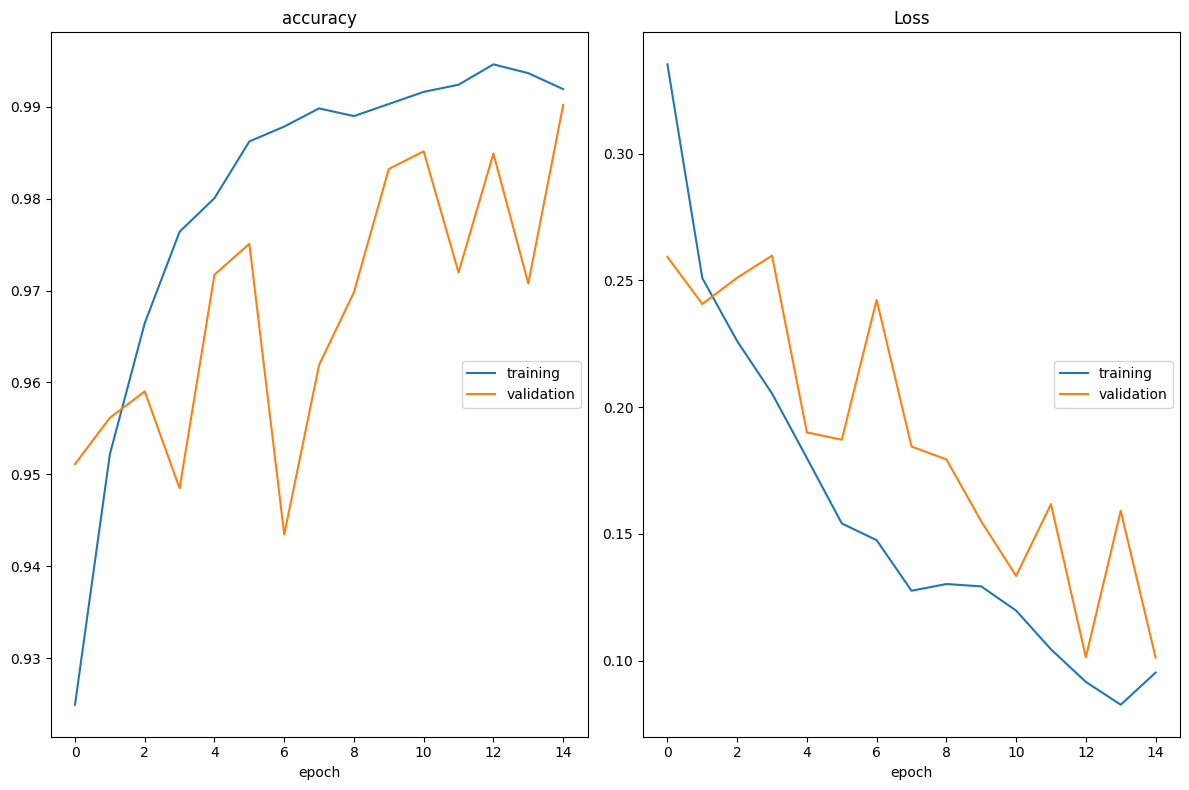

accuracy
	training         	 (min:    0.925, max:    0.995, cur:    0.992)
	validation       	 (min:    0.943, max:    0.990, cur:    0.990)
Loss
	training         	 (min:    0.083, max:    0.335, cur:    0.095)
	validation       	 (min:    0.101, max:    0.260, cur:    0.101)

Epoch 15: accuracy did not improve from 0.99461
522/522 [==============================] - 50s 95ms/step - loss: 0.0952 - accuracy: 0.9919 - val_loss: 0.1012 - val_accuracy: 0.9902 - lr: 1.0000e-04


In [10]:
# history = model.fit(train, epochs=15, validation_data=val, validation_freq=1)
epochs = 15

checkpoint = ModelCheckpoint("model_weights.h5",monitor="accuracy",save_best_only = True,
                             save_weights_only = True,
                             mode = 'auto',
                             verbose = 1)

reduce_lr = ReduceLROnPlateau(monitor="accuracy",factor=0.1,patience=2,min_lr=0.00001,mode = 'auto')

callbacks = [PlotLossesCallback(),checkpoint,reduce_lr]

history = model.fit(
    train,
    epochs = epochs,
    validation_data=val,
    validation_freq=1,
    callbacks = callbacks
)

In [11]:
# model.evaluate(test, verbose=1)
# model.compile(
#     loss='categorical_crossentropy',
#     optimizer=Adam(learning_rate=1e-4),
#     metrics=['accuracy']
# )

# model.summary()

test_loss, test_accuracy = model.evaluate(test)
print(f"Test Accuracy: {test_accuracy}")

131/131 [==============================] - 6s 45ms/step - loss: 0.0927 - accuracy: 0.9926
Test Accuracy: 0.9925712943077087


In [12]:
# lmodel.save("Model_binary.h5")
model_json = model.to_json()
with open("model_json.json",'w') as json_file:
    json_file.write(model_json)
model.save("model_h5.h5")

In [8]:
from keras.models import model_from_json
json_file = open("/kaggle/input/mri-images/tensorflow2/default/1/model_json.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("/kaggle/input/mri-images/tensorflow2/default/1/model_json.keras")

In [13]:
pred = model.predict(test)
pred = np.argmax(pred, axis=1) #pick class with highest  probability

labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

131/131 [==============================] - 6s 47ms/step


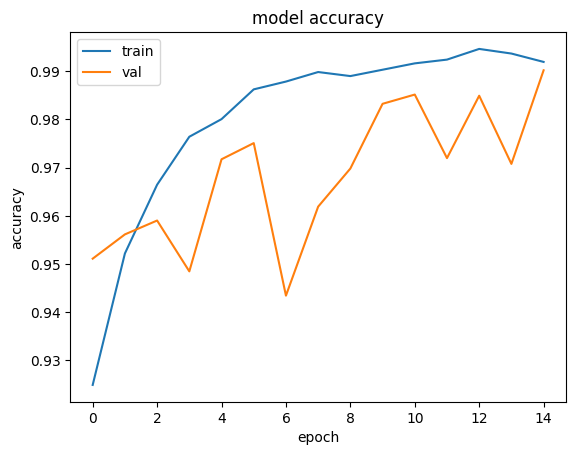

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [40]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# !pip install cufflinks 
# !pip install plotly
import cufflinks as cf
import plotly.express as px
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# to get the connection
init_notebook_mode(connected=True)

# plotly also serves online,
# but we are using just a sample
cf.go_offline()
df = pd.DataFrame({ "val_loss" : list(history.history['val_loss']),"Loss" : list(history.history['loss'])},columns=['val_loss','Loss'])
fig = px.line(df,y = ["val_loss","Loss"])
fig.write_html("val_Loss.html")
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
# plt.show()


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_test = test_images.labels # set y_test to the expected output
print(classification_report(y_test, pred2))
print("Accuracy of the Model:","{:.1f}%".format(accuracy_score(y_test, pred2)*100))

                   precision    recall  f1-score   support

    Mild Demented       1.00      0.99      1.00      2715
Moderate Demented       0.99      0.99      0.99      1955
     Non Demented       0.84      0.75      0.79       962
Very MildDemented       0.67      0.78      0.72       628

         accuracy                           0.94      6260
        macro avg       0.88      0.88      0.88      6260
     weighted avg       0.94      0.94      0.94      6260

Accuracy of the Model: 93.6%


In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_test = test_images.labels # set y_test to the expected output
print(classification_report(y_test, pred2))
print("Accuracy of the Model:","{:.1f}%".format(accuracy_score(y_test, pred2)*100))

                   precision    recall  f1-score   support

    Mild Demented       1.00      1.00      1.00      1795
Moderate Demented       1.00      1.00      1.00      1306
     Non Demented       0.97      0.99      0.98       659
Very MildDemented       0.98      0.95      0.97       413

         accuracy                           0.99      4173
        macro avg       0.99      0.98      0.99      4173
     weighted avg       0.99      0.99      0.99      4173

Accuracy of the Model: 99.2%


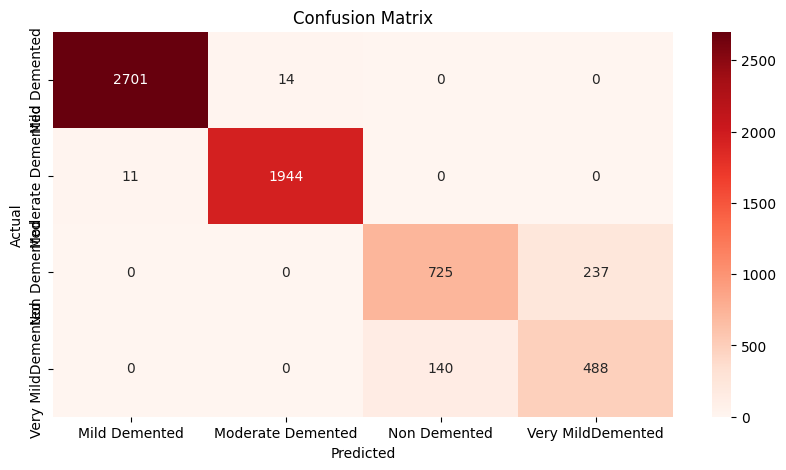

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the class labels
class_labels = ['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very MildDemented']

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred2)

# Create a figure and plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Reds')

# Set tick labels and axis labels
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Set the title
plt.title("Confusion Matrix")

# Show the plot
plt.show()